In [0]:
from google.colab import files
uploaded = files.upload()

#files.download('submission_new') #saving file

Saving df.csv to df.csv


In [0]:
import pandas as pd
import torch
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
import io

df= pd.read_csv(io.BytesIO(uploaded['df.csv']))

In [0]:
df.head()

,userid,contentid,rating,title,new_movie_id,new_user_id,genres
0,2182,40596,3.5,Michael Che Matters,0,0,''Comedy''
1,2182,17978,3.0,Accidents Happen,1,0,"'Comedy','Drama'"
2,7832,17978,3.0,Accidents Happen,1,1,"'Comedy','Drama'"
3,5476,17978,2.5,Accidents Happen,1,2,"'Comedy','Drama'"
4,10292,17978,4.5,Accidents Happen,1,3,"'Comedy','Drama'"


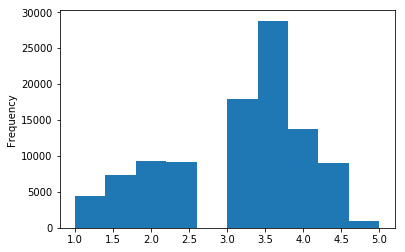

In [0]:
df.rating.plot(kind='hist',bins=10)

In [0]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25,random_state=43)

In [0]:
n_users = df.userid.nunique()
n_items = df.contentid.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 10483
Num of Movies: 17218


In [0]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[6]-1, line[5]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[6]-1, line[5]-1] = line[3]

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

# SVD

In [0]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 30)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 3.2248984912624388


In [0]:
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 3.2248984912624388


In [0]:
#making user-wise prediction 
i=1250
user='user_'+str(i)+'_rating'
predicted_rating=pd.DataFrame(list(X_pred[i]),columns=[user])
predicted_rating['new_movie_id']=[i for i in range(0,n_items)]
predicted_rating=pd.merge(predicted_rating,df[['new_movie_id','title']],on='new_movie_id')

In [0]:
predicted_rating=predicted_rating.groupby('title').mean().sort_values(by=user,ascending=False)
predicted_rating.sort_values(by=user,ascending=False).head(10)

,user_1250_rating,new_movie_id
title,,
"South of Heaven, West of Hell",0.060971,1881.0
Inception,0.035059,1855.0
The Last Rites of Ransom Pride,0.030124,1957.0
The Challenger,0.029825,392.0
Rio 2,0.027774,1540.0
Photographing Fairies,0.023177,470.0
You''re So Cupid,0.022371,2116.0
Cowboys & Aliens,0.020311,430.0
120,0.019163,1678.0


In [0]:
user_df=df[(df.new_user_id==i) & (df.rating >= 3)]
user_df

,userid,contentid,rating,title,new_movie_id,new_user_id,genres
7522,7266,17475,3.5,Win/Win,6052,1250,"'Drama','Comedy','Foreign'"
15228,7266,32887,3.5,Cayman Went,140,1250,"'Family','Drama','Romance','TVMovie'"
31580,7266,23378,3.5,Willow Creek,177,1250,"'Adventure','Horror','Mystery','Thriller'"
66017,7266,24225,4.0,Concrete Blondes,9551,1250,"'Action','Comedy','Crime'"
66030,7266,35822,4.0,Bardaasht,12556,1250,"'Drama','Foreign'"
66037,7266,31035,3.5,Shark Week,13378,1250,''Horror''


In [0]:
df[df.new_movie_id==predicted_rating.new_movie_id[3]].head(1)

,userid,contentid,rating,title,new_movie_id,new_user_id,genres
58843,11085,21827,4.5,The Challenger,392,993,"'Thriller','TVMovie','Drama','History'"


In [0]:
#list(user_df['genres'])[0]

# SVD with df_2

In [0]:
from google.colab import files
uploaded = files.upload()


In [0]:
df_1= pd.read_csv(io.BytesIO(uploaded['df_1.csv']))

In [0]:
df_1['seen']=np.ones((df_1.userid.count()))

In [0]:
df_1.head()

,userid,contentid,rating,title,new_movie_id,new_user_id,genres,seen
0,2182,40596,3.5,Michael Che Matters,0,0,''Comedy'',1.0
1,2182,17978,3.0,Accidents Happen,1,0,"'Comedy','Drama'",1.0
2,7832,17978,3.0,Accidents Happen,1,1,"'Comedy','Drama'",1.0
3,5476,17978,2.5,Accidents Happen,1,2,"'Comedy','Drama'",1.0
4,10292,17978,4.5,Accidents Happen,1,3,"'Comedy','Drama'",1.0


In [0]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_1, test_size=0.25,random_state=43)

In [0]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[6]-1, line[5]-1] = line[8]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[6]-1, line[5]-1] = line[8]

In [0]:
train_data_matrix

array([[3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [2.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [4.5, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 3. , 0. , ..., 0. , 0. , 3.5]])

In [0]:
mu_list=[] 

for i in range(0,n_users):
  for j in train_data_matrix[i]:
    if j!= 0:
      mu_list.append(j)
      
mu=sum(mu_list)/(len(mu_list))      

In [0]:
#random initialization of matrices and its iterations
# r = w*u + b + c +mu
mu=3.0979
k=20

w=np.random.randn(n_users,k)
u=np.random.randn(n_items,k)
b=np.random.randn(n_users,1)
c=np.random.randn(n_items,1)

for i in range(0,100):
  
  

In [0]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 40)
s_diag_matrix=np.diag(s)
X_pred_1= np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 0.995145617308802


In [0]:
#making user-wise prediction 
i=6237
user='user_'+str(i)+'_rating'
predicted_rating_1=pd.DataFrame(list(X_pred_1[i]),columns=[user])
predicted_rating_1['new_movie_id']=[i for i in range(0,n_items)]
predicted_rating_1=pd.merge(predicted_rating_1,df[['new_movie_id','title']],on='new_movie_id')

In [0]:
predicted_rating_1=predicted_rating_1.groupby('title').mean().sort_values(by=user,ascending=False)
predicted_rating_1.sort_values(by=user,ascending=False).head(10)

,user_6237_rating,new_movie_id
title,,
Canopy,0.492599,1012.0
Generation X,0.152273,2351.0
Stranger Than Fiction,0.093794,374.0
Top of the Food Chain,0.090988,3621.0
Trolls,0.087700,2627.0
G.I. Joe: The Rise of Cobra,0.074056,3097.0
The Last Days on Mars,0.064678,1011.0
"South of Heaven, West of Hell",0.060719,1881.0
Anuvahood,0.056173,1279.0


In [0]:
df_1[(df_1.new_user_id==i) & (df_1.rating >3)]

,userid,contentid,rating,title,new_movie_id,new_user_id,genres,seen
7331,8370,22969,2.5,Memorial Day,1495,6237,"'Action','Drama','Family','History','War'",1.0
22037,8370,29068,4.5,Testament of Youth,1013,6237,"'History','Drama','War'",1.0
25602,8370,23643,3.0,The Guest,8160,6237,"'Mystery','Thriller','Action'",1.0
60136,8370,3695,3.5,Margaret Cho: I''m the One That I Want,8726,6237,''Comedy'',1.0
63486,8370,5821,3.5,Double Whammy,11866,6237,"'Comedy','Crime','Drama'",1.0
65641,8370,30137,1.5,Fortress,10347,6237,"'Action','War'",1.0
68432,8370,9041,3.0,The Pentagon Wars,2467,6237,"'Comedy','Drama','War'",1.0
72714,8370,17538,1.5,Phineas and Ferb the Movie: Across the 2nd Dim...,1257,6237,"'Animation','Comedy','Family','TVMovie'",1.0
78772,8370,29411,3.5,Just About Famous,12705,6237,"'Comedy','Documentary'",1.0
94336,8370,12011,1.0,Saw IV,4291,6237,"'Horror','Thriller','Crime'",1.0


In [0]:
df[df.new_movie_id==predicted_rating_1.new_movie_id[0]].head(1)

,userid,contentid,rating,title,new_movie_id,new_user_id,genres
12997,10126,29141,2.5,Canopy,1012,131,"'War','Adventure','Drama'"


# RBM

In [0]:
df=df[['new_user_id','new_movie_id','rating']]

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100679 entries, 0 to 100678
Data columns (total 3 columns):
new_user_id     100679 non-null int64
new_movie_id    100679 non-null int64
rating          100679 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [0]:
df1=df[df.new_user_id <= 10000]

In [0]:
from sklearn.model_selection import train_test_split
training_set, testing_set = train_test_split(df1, test_size=0.25,random_state=99)

In [0]:
#converting to array
training_set=np.array(training_set,dtype='int')
testing_set=np.array(testing_set,dtype='int')

nb_users=int(max(max(training_set[:,0]),max(testing_set[:,0])))
nb_movies=int(max(max(training_set[:,1]),max(testing_set[:,1])))

print('nb_users:',nb_users,'nb_movies:',nb_movies)

nb_users: 2000 nb_movies: 17206


In [0]:
def convert(data):
    new_data = []
    for id_users in range(1, nb_users + 1):
        id_movies = data[:,1][data[:,0] == id_users]
        id_ratings = data[:,2][data[:,0] == id_users]
        ratings = np.zeros(nb_movies)
        ratings[id_movies - 1] = id_ratings
        new_data.append(list(ratings))
    return new_data

In [0]:
training_set=convert(training_set)
testing_set=convert(testing_set)

In [0]:
len(training_set)

1000

In [0]:
#training_set[3]

In [0]:
training_set=torch.FloatTensor(training_set)
testing_set=torch.FloatTensor(testing_set)

In [0]:
# Converting the ratings into binary ratings 1 (Liked) or 0 (Not Liked)
training_set[training_set == 0] = -1
training_set[training_set == 1] = 0
training_set[training_set == 1.5] = 0
training_set[training_set == 2] = 0
training_set[training_set == 2.5] = 0
training_set[training_set == 3] = 0
training_set[training_set >= 3.5] = 1

testing_set[testing_set == 0] = -1
testing_set[testing_set == 1] = 0
testing_set[testing_set == 1.5] = 0
testing_set[testing_set == 2] = 0
testing_set[testing_set == 2.5] = 0
testing_set[testing_set == 3] = 0
testing_set[testing_set >= 3.5] = 1


In [0]:
class RBM():
    
    def __init__(self,nv,nh):
        self.W=torch.randn(nh,nv) #100*1682
        self.a=torch.randn(1,nh) #1*100
        self.b=torch.randn(1,nv) #1*1682
        
    def sample_h(self,x):
        wx=torch.mm(x,self.W.t())  #100*1682 * 1682*100 = 100*100
        activation=wx + self.a.expand_as(wx)   #100*100
        p_h_given_v=torch.sigmoid(activation)  #100*100
        return p_h_given_v,torch.bernoulli(p_h_given_v)
    
    def sample_v(self,y):
        wy=torch.mm(y,self.W)  #100*100 * 100*1682 = 100*1682
        activation=wy + self.b.expand_as(wy)  #100*1682
        p_v_given_h=torch.sigmoid(activation)  #100*1682
        return p_v_given_h,torch.bernoulli(p_v_given_h)
    
    def train(self,v0,vk,ph0,phk):
        self.W += torch.mm(v0.t(),ph0) - torch.mm(vk.t(),phk) # 1682*100 * 100*100 = 1682*100.t() 
        self.a += torch.sum((ph0-phk),0)  # 100*100
        self.b += torch.sum((v0-vk),0)    #100*1682

In [0]:
nv = len(training_set[0])
nh = nv
batch_size = 200
rbm = RBM(nv, nh)

In [0]:
# Training the RBM
nb_epoch = 1
for epoch in range(1, nb_epoch + 1):
    train_loss = 0
    s = 0.
    for id_user in range(0, nb_users - batch_size, batch_size):
        vk = training_set[id_user:id_user+batch_size]  #100*1682
        v0 = training_set[id_user:id_user+batch_size]  #100*1682
        ph0,_ = rbm.sample_h(v0)
        for k in range(10):
            _,hk = rbm.sample_h(vk)
            _,vk = rbm.sample_v(hk)
            vk[v0<0] = v0[v0<0]
        phk,_ = rbm.sample_h(vk)
        rbm.train(v0, vk, ph0, phk)
        train_loss += torch.mean(torch.abs(v0[v0>=0] - vk[v0>=0]))
        s += 1.
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))


In [0]:
test_loss = 0
s = 0.
pred=[]
for id_user in range(nb_users):
    v = training_set[id_user:id_user+1]
    vt = testing_set[id_user:id_user+1]
    if len(vt[vt>=0]) > 0:
        _,h = rbm.sample_h(v)
        _,v = rbm.sample_v(h)
        test_loss += torch.mean(torch.abs(vt[vt>=0] - v[vt>=0]))
        s += 1.
        pred.append(v)
print('test loss: '+str(test_loss/s))

test loss: tensor(0.2761)


In [0]:
testing_set

tensor([[ 0., -1., -1.,  ..., -1., -1., -1.],
        [ 0., -1., -1.,  ..., -1., -1., -1.],
        [ 1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

# Stacked Autoencoders

In [0]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

In [0]:
df=df[['new_user_id','new_movie_id','rating']]
df1=df[df.new_user_id <= 2000]

In [0]:
from sklearn.model_selection import train_test_split
training_set, testing_set = train_test_split(df1, test_size=0.25,random_state=43)

In [0]:
#df1.groupby('new_movie_id').count()

In [0]:
#converting to array
training_set=np.array(training_set,dtype='int')
testing_set=np.array(testing_set,dtype='int')

nb_users=int(max(max(training_set[:,0]),max(testing_set[:,0])))
nb_movies=int(max(max(training_set[:,1]),max(testing_set[:,1])))

print('nb_users:',nb_users,'nb_movies:',nb_movies)

nb_users: 2000 nb_movies: 17206


In [0]:
def convert(data):
    new_data = []
    for id_users in range(1, nb_users + 1):
        id_movies = data[:,1][data[:,0] == id_users]
        id_ratings = data[:,2][data[:,0] == id_users]
        ratings = np.zeros(nb_movies)
        ratings[id_movies - 1] = id_ratings
        new_data.append(list(ratings))
    return new_data

In [0]:
training_set=convert(training_set)
testing_set=convert(testing_set)

In [0]:
#Converting to torch tensor

training_set=torch.FloatTensor(training_set)
testing_set=torch.FloatTensor(testing_set)

In [0]:
# Creating the architecture of the Neural Network
class SAE(nn.Module):
    def __init__(self, ):
        super(SAE, self).__init__()
        self.fc1 = nn.Linear(nb_movies, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 20)
        self.fc4 = nn.Linear(20, nb_movies)
        self.activation = nn.Sigmoid()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

sae = SAE()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(sae.parameters(), lr = 0.01, weight_decay = 0.5)

In [0]:
# Training the SAE
nb_epoch = 20
for epoch in range(1, nb_epoch + 1):
    train_loss = 0
    s = 0.
    for id_user in range(nb_users):
        input = Variable(training_set[id_user]).unsqueeze(0)
        target = input.clone()
        if torch.sum(target.data > 0) > 0:
            output = sae(input)
            target.require_grad = False
            output[target == 0] = 0
            loss = criterion(output, target)
            mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
            loss.backward()
            train_loss += np.sqrt(loss.data*mean_corrector)
            s += 1.
            optimizer.step()
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))


In [0]:
test_loss = 0
s = 0.
pred=[]
for id_user in range(nb_users):
    input = Variable(training_set[id_user]).unsqueeze(0)
    target = Variable(testing_set[id_user]).unsqueeze(0)
    if torch.sum(target.data > 0) > 0:
        output = sae(input)
        target.require_grad = False
        output[target == 0] = 0
        loss = criterion(output, target)
        mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
        test_loss += np.sqrt(loss.data*mean_corrector)
        s += 1.
    pred.append(output)
print('test loss: '+str(test_loss/s))

test loss: tensor(1.174)


In [0]:
pred=pred[0].detach().numpy()
#pred=pd.DataFrame(pred[0],columns=['rating'])

In [0]:
pred.sort_values(by='rating',ascending=False).head()

,rating
5909,0.413518
6473,0.235135
0,0.162726
1046,0.017754
11463,0.000000


In [0]:
test=testing_set[0].numpy()
test=pd.DataFrame(test,columns=['rating'])

In [0]:
test.sort_values(by='rating',ascending=False).head()

,rating
0,3.0
5909,3.0
6473,3.0
1046,1.0
11463,0.0
